# Supplementary Material (Villas Bôas et al. 2024)
### Highlight the SST feedback on the Wind Speed from Satellite observations

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import glob
from scipy.interpolate import griddata

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy


In [2]:
path_out = '../figures/'
file_out_anom = 'SI_figure_SST_WindSpeed_anom.png'

In [3]:
lon_min, lon_max, lat_min, lat_max = -80+360, -70.5+360, 31.5, 40

In [4]:
ds_sst = xr.open_dataset('/Users/gwen29360/Desktop/POSTDOC/Mines/SWOT/DATA/data_4_paper/SST_WIND_anomaly/sept_sst_anom.nc')
ds_windspeed = xr.open_dataset('/Users/gwen29360/Desktop/POSTDOC/Mines/SWOT/DATA/data_4_paper/SST_WIND_anomaly/sept_windspeed_anom.nc')
ds_sst = ds_sst.mean(dim = 'observations')
ds_windspeed = ds_windspeed.mean(dim = 'observations')

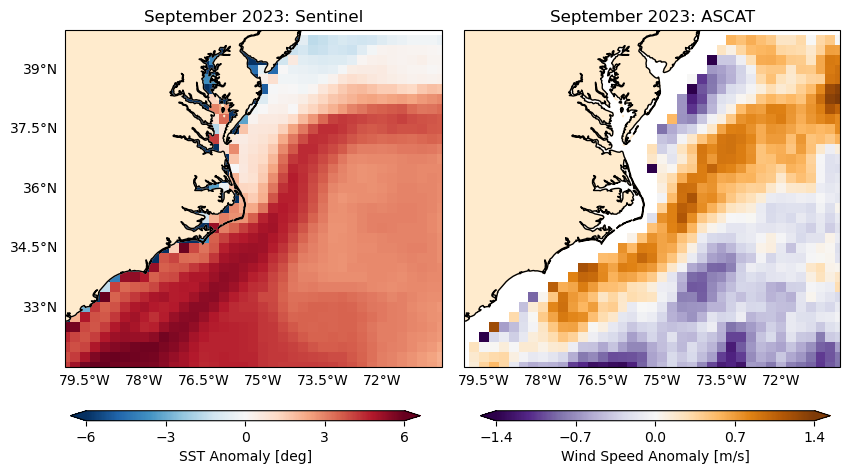

In [5]:

fig = plt.figure(figsize = (10, 5))

ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)

gl.right_labels = False
gl.left_labels = True
gl.bottom_labels =True
gl.top_labels =False

ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


p1 = ax.pcolormesh(ds_sst.longitude, ds_sst.latitude, ds_sst.sst_anomaly, vmin = -6, vmax = 6, cmap = 'RdBu_r')
plt.title('September 2023: Sentinel')
cax = fig.add_axes([.13, .05, 0.35, 0.02])

cbar = plt.colorbar(p1, cax = cax, orientation = 'horizontal', ticks = [-6, -3, 0, 3, 6], extend = 'both')
cbar.ax.set_xlabel('SST Anomaly [deg]')

ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)

gl.right_labels =False
gl.left_labels = False
gl.bottom_labels =True
gl.top_labels =False

ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)

p2 = ax.pcolormesh(ds_windspeed.longitude, ds_windspeed.latitude, ds_windspeed.wind_anomaly, vmin = -1.4, vmax = 1.4, cmap = 'PuOr_r')
plt.title('September 2023: ASCAT')
cax = fig.add_axes([.54, .05, 0.35, 0.02])
cbar = plt.colorbar(p2, cax = cax, orientation = 'horizontal', ticks = [-1.4, -.7, 0, .7, 1.4], extend =  'both')
cbar.ax.set_xlabel('Wind Speed Anomaly [m/s]')
plt.subplots_adjust(wspace= .06)

plt.savefig(path_out + file_out_anom, dpi = 300, bbox_inches = 'tight')
